# 103090 - Big Data Project


## Activity 1: Big data project presentation

## Business Use Case: Enhancing Customer Experience and Business Operations

### 1. Goals:

* Business Performance Analysis: Examine the relationship between a business's location, category, and its performance (as indicated by star ratings and review counts). This can help identify which types of businesses perform well in specific areas or regions.
* Try to predict the rating that a company will have depending on its characteristics. This can help us detect the risk associated with a company.

### 2. Possible Obstacles:

* Data Quality and Completeness: Ensuring the data is accurate and complete for meaningful analysis.
* Integration with Existing Systems: Seamlessly integrating insights from this data into current business practices.

### 3. Stakeholders:

* Business Owners: Concerned about ROI and implementation costs.
* Marketing Team: Requires accurate data for targeted campaigns.
* Investors: The predicted ratings can directly impact their investment decisions.

## Technical Requirements:

### 1. Define and Examine Data Sources:

* Data Source: The current JSON dataset with business information.
* Data Validation: Ensure data quality and handle missing or inconsistent data.

### 2. Working with the Data:

* Data Analysis: Perform exploratory data analysis to understand trends and patterns.
* Data Processing: Clean, transform, and structure data for analysis.
* Data Visualization: Create visualizations to present insights to stakeholders.
* Machine Learning: Apply predictive models for customer behavior prediction or recommendation systems.

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_json("/content/drive/MyDrive/colab/yelp_academic_dataset_business.json")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ValueError: ignored

First look to the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


#### We sum the total hours a business is open per week

In [ ]:

def parse_time(time_str):
    """
    Parse a time string in the format 'H:M' to minutes.
    """
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

def calculate_business_hours(hours_data):
    """
    Calculate the total weekly business hours from the hours data.
    """

    if hours_data is None:
        return 0

    total_minutes = 0
    for day, hours in hours_data.items():
        if '-' in hours:  # Ensure the business is open that day
            open_time, close_time = hours.split('-')
            total_minutes += parse_time(close_time) - parse_time(open_time)
    return total_minutes / 60  # Convert total minutes to hours

df['hours'] = df['hours'].apply(calculate_business_hours)

#### We calculate the total number of categories to which each business belongs

In [ ]:
def count_categories(category_string):
    """
    Count the number of categories in the category string.
    """
    if pd.isna(category_string):
        return 0  # Return 0 if the category string is NaN
    categories = category_string.split(', ')
    return len(categories)

# Apply the function to create a new column
df['category_count'] = df['categories'].apply(count_categories)
# Filtrar utilizando loc
test = df.loc[df['category_count'] > 20]

# Imprimir el DataFrame filtrado
print(test)

                   business_id                                       name  \
3088    kdboJGRQZXuKYLIFMvsoJw  Boise Auto Repair Mobile Tech Auto Repair   
20860   6Z_wgNTh5HJ7NhFghVe2vA                         Nashville FlyBoard   
57614   iOFbMitGdfU6i5xm4nZ8Ww         Blue Willow Restaurant & Gift Shop   
68356   jd8ID239kuHBpuJ3_B30jQ                   The Wellness Kitchenista   
86433   mmlZz6ypFdgHROjt2AnSsw               Hi-Tech Intelligent Services   
87051   TfRyyMfqDxtC1KA1jLkmvg                           NEST Center City   
100114  4fKGv-3XMlxv_vuiFbuwLA                               The Drive In   
102531  lPday_z2XpRJqbFWyCh6dw                        Taste Safety Harbor   
106436  5hyIty7KkRfVE_1gCKbUvw             Delectables Catering and Venue   
109412  -mDAFyX5kZHXhxjELeMhiQ                             Winslow's Home   
137013  Zk4aemT88EwIvoa-19z4mg                        I-4 Power Equipment   
143157  ytynqOUb3hjKeJfRj5Tshw                    Reading Terminal Market   

In [ ]:
categorical = df.select_dtypes(include = "object")
continuous = df.select_dtypes(include = "number")

In [ ]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  150346 non-null  object
 1   name         150346 non-null  object
 2   address      150346 non-null  object
 3   city         150346 non-null  object
 4   state        150346 non-null  object
 5   postal_code  150346 non-null  object
 6   attributes   136602 non-null  object
 7   categories   150243 non-null  object
dtypes: object(8)
memory usage: 9.2+ MB


In [ ]:
categorical

,business_id,name,address,city,state,postal_code,attributes,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food"
...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas"
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician..."


In [ ]:
continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitude        150346 non-null  float64
 1   longitude       150346 non-null  float64
 2   stars           150346 non-null  float64
 3   review_count    150346 non-null  int64  
 4   is_open         150346 non-null  int64  
 5   hours           150346 non-null  float64
 6   category_count  150346 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 8.0 MB


In [ ]:
continuous

,latitude,longitude,stars,review_count,is_open,hours,category_count
0,34.426679,-119.711197,5.0,7,0,0.0,6
1,38.551126,-90.335695,3.0,15,1,48.0,5
2,32.223236,-110.880452,3.5,22,0,100.0,6
3,39.955505,-75.155564,4.0,80,1,94.0,5
4,40.338183,-75.471659,4.5,13,1,40.0,3
...,...,...,...,...,...,...,...
150341,53.468419,-113.492054,3.0,13,1,61.0,2
150342,36.115118,-86.766925,4.0,5,1,64.0,7
150343,39.908707,-86.065088,3.5,8,1,0.0,7
150344,38.782351,-89.950558,4.0,24,1,70.0,5


#### Data Visualization: Understanding distributions and relationships

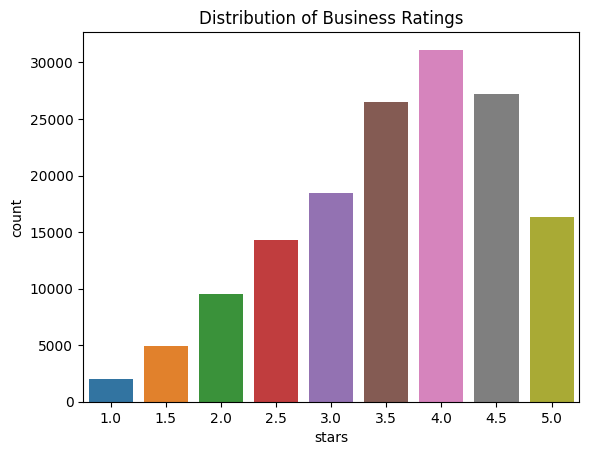

In [ ]:
sns.countplot(x='stars', data=df)
plt.title('Distribution of Business Ratings')
plt.show()

3.5967235576603303


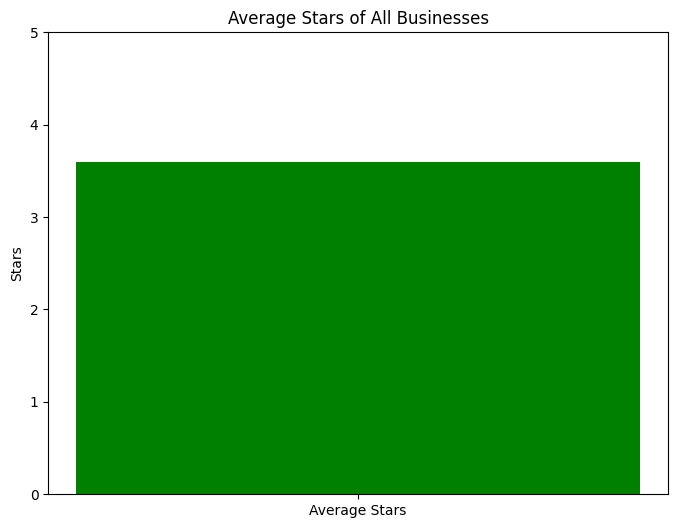

In [ ]:
average_stars = df['stars'].mean()
print(average_stars)
# Plotting the average stars
plt.figure(figsize=(8, 6))
plt.bar('Average Stars', average_stars, color='green')
plt.ylabel('Stars')
plt.title('Average Stars of All Businesses')
plt.ylim(0, 5)  # Setting y-axis limit to match star rating scale
plt.show()

Text(0, 0.5, 'Number of Businesses')

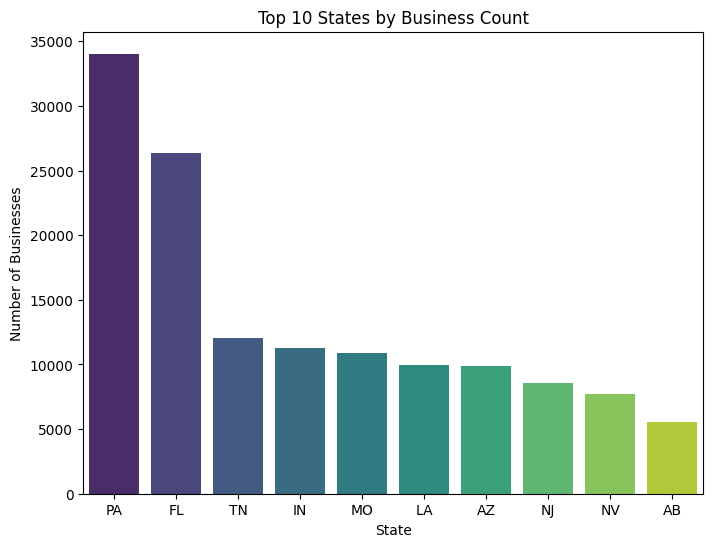

In [ ]:
business_per_state = df['state'].value_counts()
# Geographical Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=business_per_state.index[:10], y=business_per_state.values[:10], palette='viridis')
plt.title('Top 10 States by Business Count')
plt.xlabel('State')
plt.ylabel('Number of Businesses')

44.86656113232144


Text(0, 0.5, 'Average Reviews')

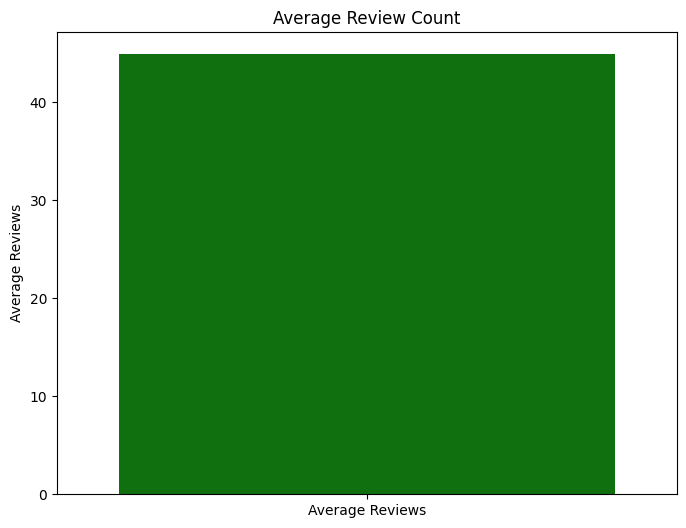

In [ ]:
avg_reviews = df['review_count'].mean()
print(avg_reviews)
# Plot for Average Reviews
plt.figure(figsize=(8, 6))
sns.barplot(x=['Average Reviews'], y=[avg_reviews], palette=['green'])
plt.title('Average Review Count')
plt.ylabel('Average Reviews')

Text(0, 0.5, 'Category')

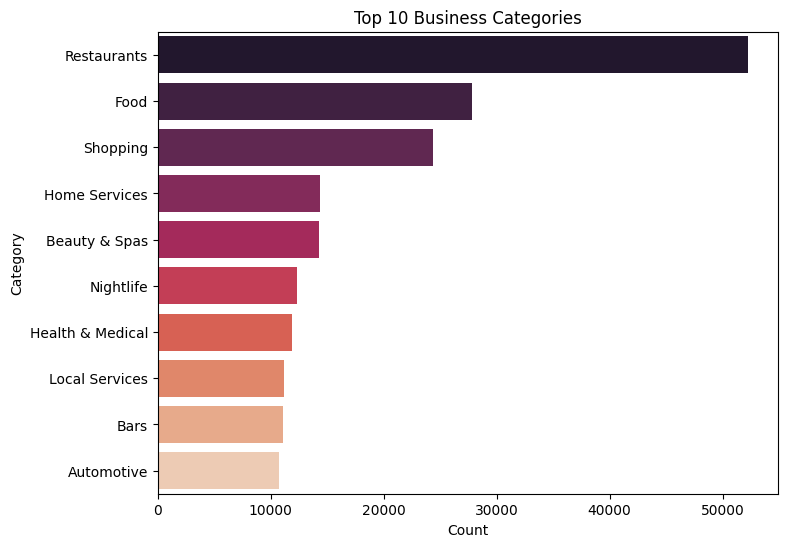

In [ ]:
df['categories'] = df['categories'].fillna('')
all_categories = [category for sublist in df['categories'].str.split(', ') for category in sublist if category]
categories_count = pd.Series(all_categories).value_counts().head(10)
# Top Business Categories
plt.figure(figsize=(8, 6))
sns.barplot(x=categories_count.values, y=categories_count.index, palette='rocket')
plt.title('Top 10 Business Categories')
plt.xlabel('Count')
plt.ylabel('Category')

18302


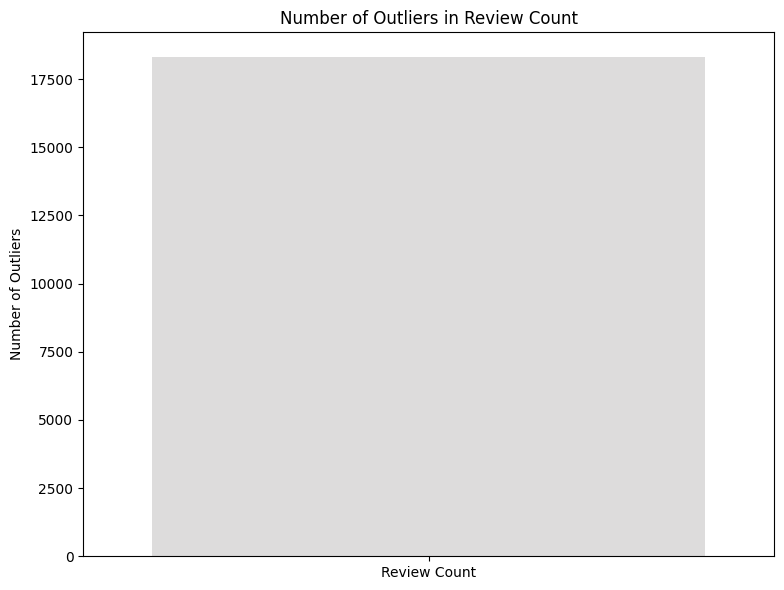

{'Outliers': {'Review Count': 18302},
 'Top Missing Values Columns': {'attributes': 0.0914158008859564,
  'business_id': 0.0,
  'name': 0.0,
  'address': 0.0,
  'city': 0.0,
  'state': 0.0,
  'postal_code': 0.0,
  'latitude': 0.0,
  'longitude': 0.0,
  'stars': 0.0}}

In [ ]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()
    return outliers
df_new = df
# Detecting outliers in 'review_count'
outliers_reviews = detect_outliers(df_new, 'review_count')
print(outliers_reviews)

# Data Quality Assessment: Checking for missing values
missing_values = df_new.isnull().mean().sort_values(ascending=False).head(10)

# Creating the dashboard
plt.figure(figsize=(15, 6))

# Plot for Outliers
plt.subplot(1, 2, 1)
sns.barplot(x=['Review Count'], y=[outliers_reviews], palette='coolwarm')
plt.title('Number of Outliers in Review Count')
plt.ylabel('Number of Outliers')

plt.tight_layout()
plt.show()

# Returning text summary of potential data problems
potential_problems = {
    'Outliers': {
        'Review Count': outliers_reviews
    },
    'Top Missing Values Columns': missing_values.to_dict()
}

potential_problems

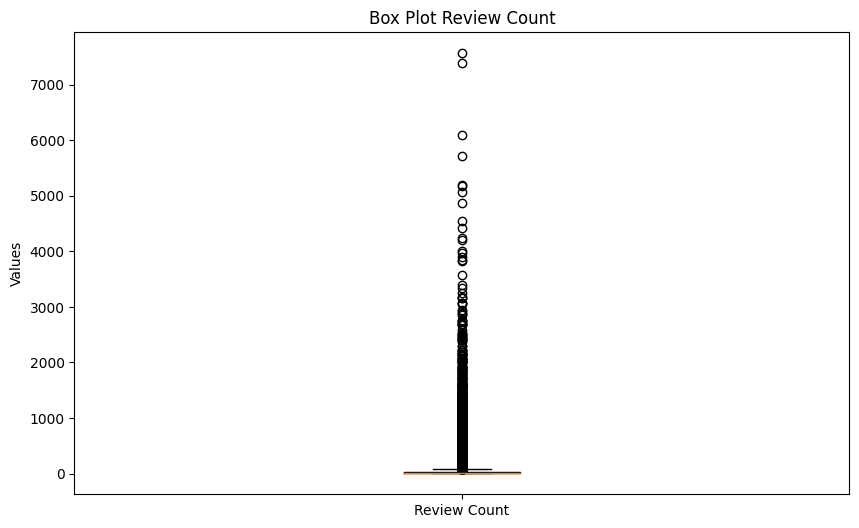

In [ ]:
# We will create a box plot for 'stars' and 'review_count' to identify any outliers in these two fields
plt.figure(figsize=(10, 6))

# Creating a box plot
plt.boxplot( df['review_count'], labels=[ 'Review Count'])
plt.title('Box Plot Review Count')
plt.ylabel('Values')

# Displaying the plot
plt.show()

In [ ]:
for column in df:
  if df[column].isnull().sum() > 0:
    print("Column " + df[column].name + " has " + str(df[column].isnull().sum()) + " missing values.")

Column attributes has 13744 missing values.


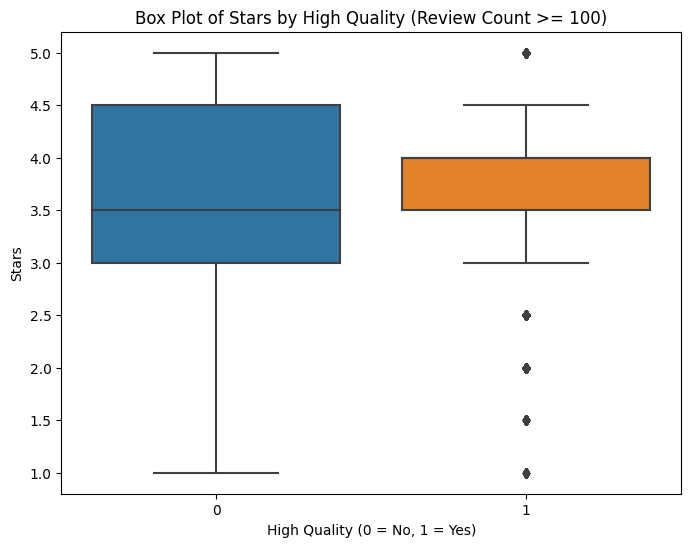

In [ ]:
df['high_quality'] = (df['review_count'] >= 100).astype(int)

# Setting up a single plot instead of a subplot grid
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['high_quality'], y=df['stars'])

plt.title('Box Plot of Stars by High Quality (Review Count >= 100)')
plt.xlabel('High Quality (0 = No, 1 = Yes)')
plt.ylabel('Stars')

# Displaying the plot
plt.show()

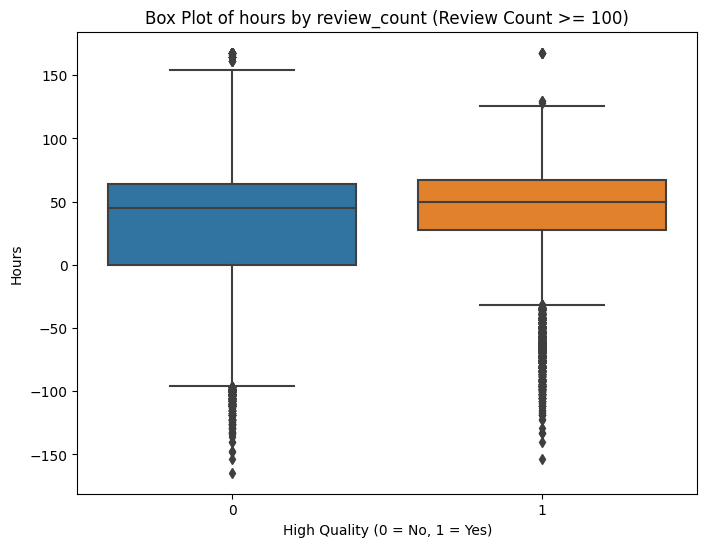

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['high_quality'], y=df['hours'])

plt.title('Box Plot of hours by review_count (Review Count >= 100)')
plt.xlabel('High Quality (0 = No, 1 = Yes)')
plt.ylabel('Hours')

# Displaying the plot
plt.show()

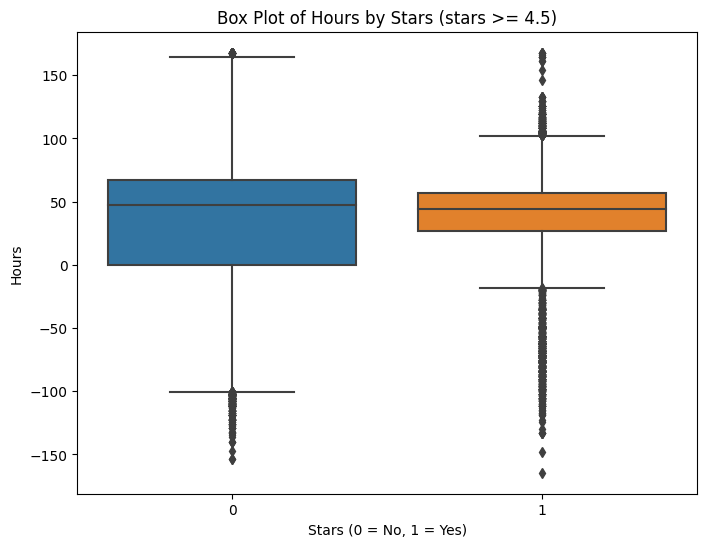

In [ ]:
df['high_quality'] = (df['stars'] >= 4.5).astype(int)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['high_quality'], y=df['hours'])

plt.title('Box Plot of Hours by Stars (stars >= 4.5)')
plt.xlabel('Stars (0 = No, 1 = Yes)')
plt.ylabel('Hours')

# Displaying the plot
plt.show()

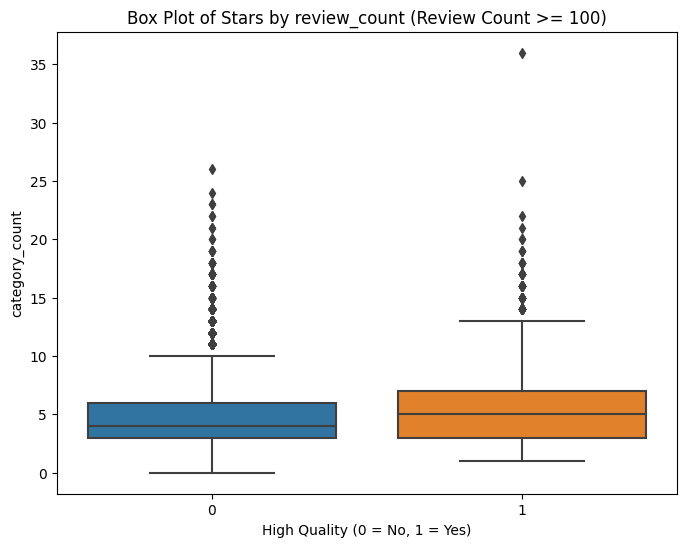

In [ ]:
df['high_quality'] = (df['review_count'] >= 100).astype(int)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['high_quality'], y=df['category_count'])

plt.title('Box Plot of Stars by review_count (Review Count >= 100)')
plt.xlabel('High Quality (0 = No, 1 = Yes)')
plt.ylabel('category_count')

# Displaying the plot
plt.show()

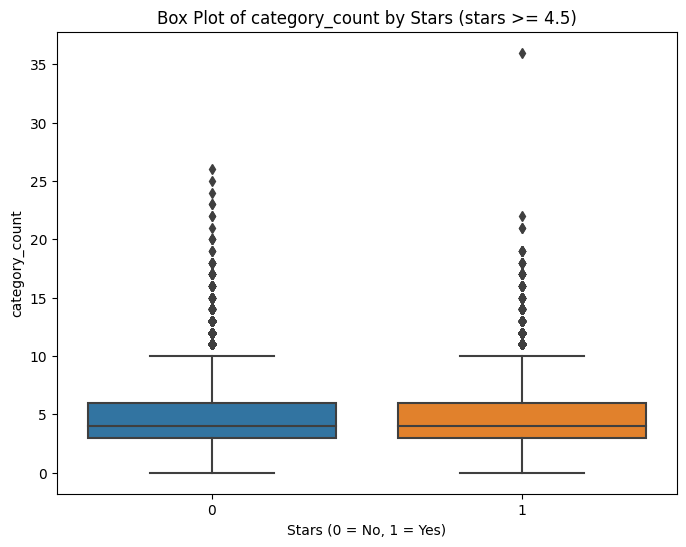

In [ ]:
df['high_quality'] = (df['stars'] >= 4.5).astype(int)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['high_quality'], y=df['category_count'])

plt.title('Box Plot of category_count by Stars (stars >= 4.5)')
plt.xlabel('Stars (0 = No, 1 = Yes)')
plt.ylabel('category_count')

# Displaying the plot
plt.show()

Next steps:
* Select the features that we want to use and discard the others.
* Impute the missing values using different imputers.
* Encode the values to work with an specific ml model.
* Filter by categories/attributes
* Create new categories, make the data set more narrow

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=8b2b3fe8373e9c7726c654459d771414bd6c84f0fa0e3dd17da9dfeb43163c13
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import pyspark
import itertools

In [ ]:
from pyspark.sql import SparkSession


# Create a Spark session
spark = SparkSession.builder \
    .appName("Large JSON Processing") \
    .config("spark.executor.heartbeatInterval", "200000")\
    .config("spark.network.timeout", "300000")\
    .config("spark.executor.memory", "47185920000") \
    .getOrCreate()

In [ ]:
json_file_path = '/content/drive/MyDrive/colab/yelp_academic_dataset_business_add.json'

df_add = spark.read.json(json_file_path)

In [ ]:
df = spark.read.json("/content/drive/MyDrive/colab/yelp_academic_dataset_business.json")

In [ ]:
df_add.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+---------------+--------------------+----------------+----------------+-----------+------------+--------------------+-----+-----+
|             address|          attributes|         business_id|     business_id_rev|          categories|         city|               hours|is_open|     latitude|      longitude|                name|negative_reviews|positive_reviews|postal_code|review_count|review_count_reviews|stars|state|
+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+---------------+--------------------+----------------+----------------+-----------+------------+--------------------+-----+-----+
| 10359 104 Street NW|[NULL, NULL, u'be...|WKMJwqnfZKsAae75R...|WKMJwqnfZKsAae75R...|Coffee & Tea, Foo...|     Edmonton|[

In [ ]:
df.show()

+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|          city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+--------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|{NULL, NULL, NULL...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...| Santa Barbara|                NULL|      0|   34.4266787|  -119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|{NULL, NULL, NULL...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|        Affton|{8:0-18:30, 0:0-0...|      1|   

In [ ]:
df_add_drop = df_add["review_count_reviews"]

#### USA state population: https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html

#### Average salary state: https://www.sofi.com/learn/content/average-salary-in-us/

#### Dataset: https://www.yelp.com/dataset